#  Boston Housing Dataset Linear Regression

[Boston Housing Dataset on kaggle](https://www.kaggle.com/heptapod/uci-ml-datasets/data)

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bh = datasets.load_boston()

In [3]:
bh.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(bh.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
bh.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
df=pd.DataFrame(data=bh.data,columns=bh.feature_names)
df['price']=bh.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Exploratory Data Analysis (EDA)

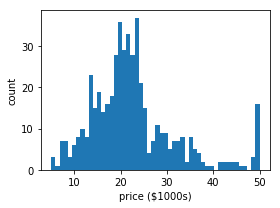

In [9]:
plt.figure(figsize=(4, 3))
plt.hist(df['price'], bins=50)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout();

Check for `Crime rate (CRIM)`, `No. of rooms (RM)`,`Age of the house (AGE)` , `% lower status of the population (LSTAT)`, ` weighted distances to five Boston employment centres (DIS)` and `price`

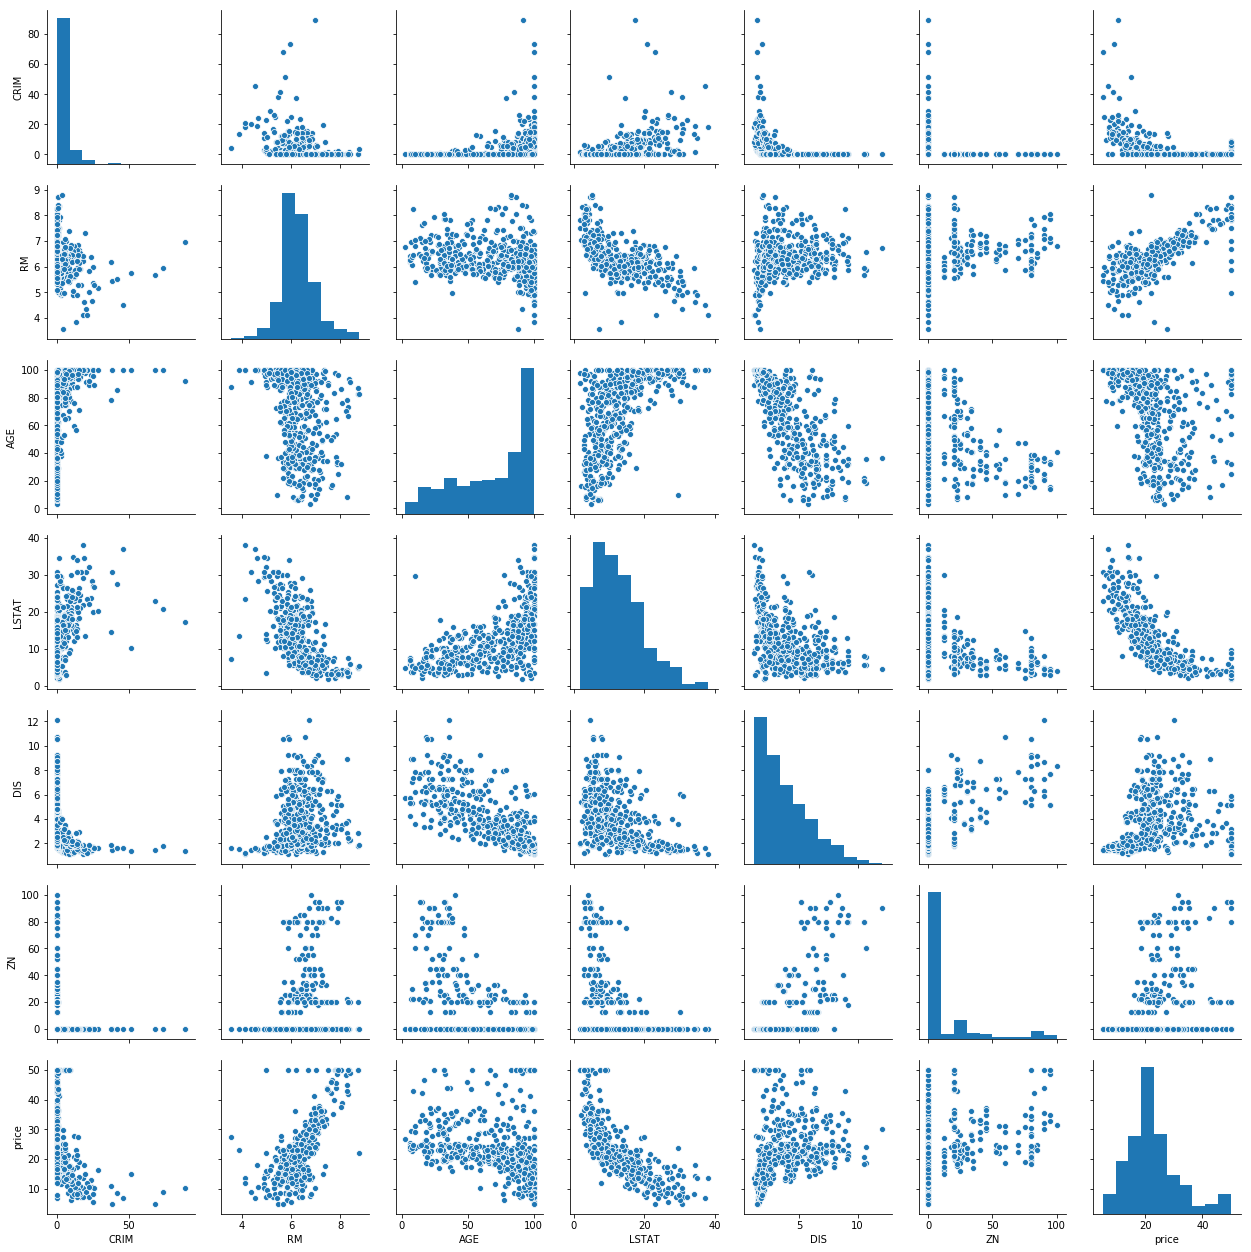

In [10]:
sns.pairplot(df[['CRIM','RM','AGE','LSTAT','DIS','ZN','price']]);
#sns.pairplot(df)

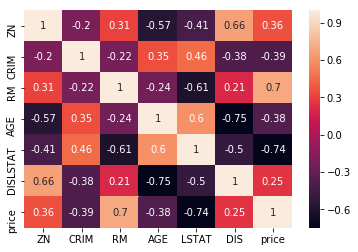

In [11]:
#sns.heatmap(df.corr())
sns.heatmap(df[['ZN','CRIM','RM','AGE','LSTAT','DIS','price']].corr()
            , annot=True);

In [12]:
X = df[['ZN','CRIM','RM','AGE','LSTAT','DIS']]
y = df['price']

# Linear Regression Model

### Train Test Split 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
X_train.head()

,ZN,CRIM,RM,AGE,LSTAT,DIS
478,0.0,10.23300,6.185,96.7,18.03,2.1705
26,0.0,0.67191,5.813,90.3,14.81,4.6820
7,12.5,0.14455,6.172,96.1,19.15,5.9505
492,0.0,0.11132,5.983,83.5,13.35,2.1099
108,0.0,0.12802,6.474,97.1,12.27,2.4329


## Creating and Training the Model

In [15]:
#LinearRegression model 
from sklearn import linear_model

In [16]:
lm = linear_model.LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Model Evaluation

In [18]:
print(lm.intercept_)

8.90528697198801


In [19]:
print(lm.coef_)

[ 0.05834141 -0.17564927  4.53727272 -0.02529785 -0.66556685 -1.24284723]


In [20]:
coeffs = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeffs

,Coefficient
ZN,0.058341
CRIM,-0.175649
RM,4.537273
AGE,-0.025298
LSTAT,-0.665567
DIS,-1.242847


Let's take RM = 3.839684 
* This suggests, if we keep all other coefficients constant, a one unit increase in the RM is associated with an increase of 3.839684 in the price.

### Predictions

In [21]:
# Predictions from the model 
predictions = lm.predict(X_test)

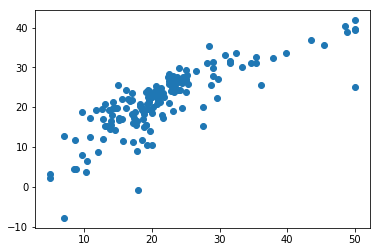

In [22]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions');

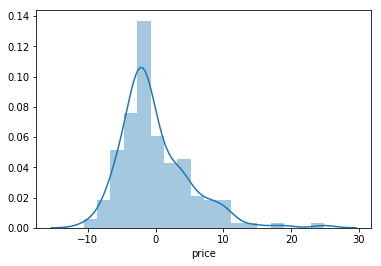

In [23]:
sns.distplot(y_test-predictions);

## Regression Evaluation Metrics


**[Mean Absolute Error]** (MAE) is the mean of the absolute value of the errors: <br>
it's the average error!

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i  |$$

**[Mean Squared Error]** (MSE) is the mean of the squared errors:<br>
**MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**[Root Mean Squared Error]** (RMSE) is the square root of the mean of the squared errors:<br>
**RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units. 

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [24]:
from sklearn import metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.872312558751269
MSE: 26.598371716003292
RMSE: 5.1573609255125135
